In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/millions-of-movies/movies.csv


In [129]:
import warnings
warnings.filterwarnings("ignore")

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [130]:
movies_filepath = "/kaggle/input/millions-of-movies/movies.csv"
df = pd.read_csv(movies_filepath)
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,Following their explosive showdown Godzilla an...,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000.0,558503759.0,115.0,Released,Rise together or fall alone.,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,giant monster-sequel-dinosaur-kaiju-fantasy wo...,/v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,1011985-1275232-359410-601796-967847-653346-69...
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...


In [131]:
df = df.drop_duplicates(subset=['id'])
df.set_index('id', inplace=True)

# EDA Lite

In [132]:
n_init = len(df)
print(n_init)
df.describe()

662083


,popularity,budget,revenue,runtime,vote_average,vote_count
count,662083.000000,6.620830e+05,6.620830e+05,6.297850e+05,662083.000000,662083.000000
mean,1.928445,4.318728e+05,1.083114e+06,2.114327e+02,2.359603,30.359913
std,25.820322,8.552511e+06,2.123574e+07,8.972120e+04,3.150094,408.166098
min,0.000000,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,0.600000,0.000000e+00,0.000000e+00,5.000000e+00,0.000000,0.000000
50%,0.600000,0.000000e+00,0.000000e+00,4.500000e+01,0.000000,0.000000
75%,1.241000,0.000000e+00,0.000000e+00,9.000000e+01,5.500000,2.000000
max,10484.676000,5.000000e+09,2.920357e+09,5.050505e+07,10.000000,33262.000000


## Status

In [133]:
df['status'].unique()

array(['Released', 'Post Production', 'In Production', 'Planned',
       'Canceled', 'Rumored'], dtype=object)

<Axes: xlabel='status', ylabel='Count'>

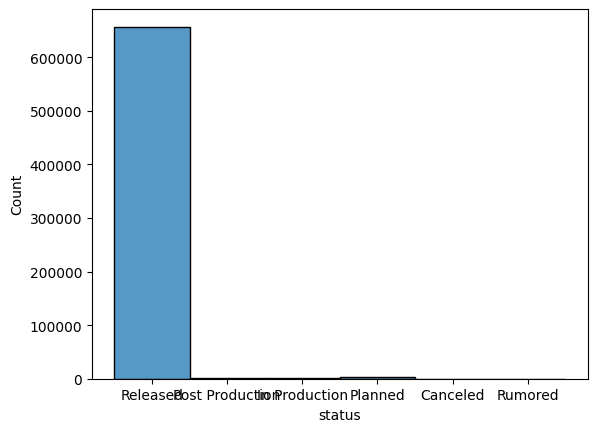

In [134]:
sns.histplot(df['status'])

In [135]:
df = df[df['status'] == 'Released']

n = len(df)
print(n / n_init)

0.9924118275201146


In [136]:
# Can drop the status column as well as backdrop path. Keeping poster path so later steps are easier with recommendation frontend
df = df.drop(columns=['status', 'backdrop_path'])

df.describe()

,popularity,budget,revenue,runtime,vote_average,vote_count
count,657059.000000,6.570590e+05,6.570590e+05,6.253650e+05,657059.000000,657059.000000
mean,1.933354,4.296401e+05,1.089958e+06,2.128400e+02,2.376710,30.591901
std,25.914458,8.541533e+06,2.129623e+07,9.003771e+04,3.154627,409.714932
min,0.000000,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,0.600000,0.000000e+00,0.000000e+00,5.000000e+00,0.000000,0.000000
50%,0.600000,0.000000e+00,0.000000e+00,4.600000e+01,0.000000,0.000000
75%,1.245000,0.000000e+00,0.000000e+00,9.000000e+01,5.500000,2.000000
max,10484.676000,5.000000e+09,2.920357e+09,5.050505e+07,10.000000,33262.000000


## Numerical correlations

In [137]:
df.dtypes

title                    object
genres                   object
original_language        object
overview                 object
popularity              float64
production_companies     object
release_date             object
budget                  float64
revenue                 float64
runtime                 float64
tagline                  object
vote_average            float64
vote_count              float64
credits                  object
keywords                 object
poster_path              object
recommendations          object
dtype: object

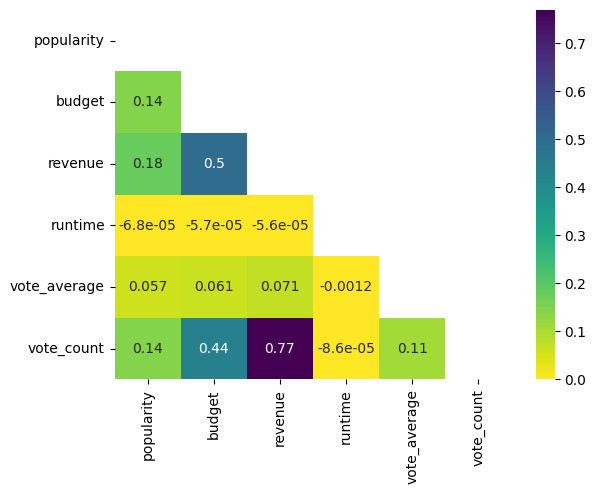

In [138]:
numerical_cols = ['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
df_numerical_corr = df[numerical_cols].corr()

mask = np.triu(np.ones_like(df_numerical_corr))
sns.heatmap(df_numerical_corr, cmap="viridis_r", mask=mask, annot=True);

In [139]:
for col in numerical_cols:
    df_col = df[col]
    n_na = df_col.isnull().sum()
    df_col = df[col].dropna()
    
    print('{}: {} nan values, {} - {}. Mean: {}, std: {}.'.format(col, n_na, df_col.min(), df_col.max(), df_col.mean(), df_col.std()))


popularity: 0 nan values, 0.0 - 10484.676. Mean: 1.9333543243453002, std: 25.91445800692782.
budget: 0 nan values, 0.0 - 5000000000.0. Mean: 429640.0594254093, std: 8541532.543778745.
revenue: 0 nan values, -12.0 - 2920357254.0. Mean: 1089957.9263003778, std: 21296226.458905924.
runtime: 31694 nan values, 0.0 - 50505050.0. Mean: 212.8399526676421, std: 90037.71065351248.
vote_average: 0 nan values, 0.0 - 10.0. Mean: 2.376710141707213, std: 3.154626690490933.
vote_count: 0 nan values, 0.0 - 33262.0. Mean: 30.591901183911947, std: 409.71493183003827.


In [140]:
x = (df['popularity'] == 0).sum()
print('{}, {}% with popularity == 0'.format(x, x * 100 / n))
x = (df['popularity'] < 1).sum()
print('{}, {}% with popularity < 1'.format(x, x * 100 / n))

1, 0.0001521933342363471% with popularity == 0
458246, 69.74198664046912% with popularity < 1


### Numerical cols

There are some correlations and I don't think I necessarily need all of these columns but it isn't obvious how to drop or combine columns. I'll keep them all.

### Trim Data

TMDB has a ton of movies and the vast majority are not going to be useful movie suggestions. I could spend a lot of time trying to figure out an optimal partition, but for now I will just drop movies with popularity < 1 or vote_count < 1, somewhat arbitrarily.

In [141]:
df = df[(df['popularity'] > 1) & (df['vote_count'] > 1)]
df.describe()

,popularity,budget,revenue,runtime,vote_average,vote_count
count,126203.000000,1.262030e+05,1.262030e+05,125926.00000,126203.000000,126203.000000
mean,6.666007,2.118409e+06,5.571661e+06,88.73602,5.985474,157.126534
std,58.797584,1.274652e+07,4.778178e+07,196.60256,1.309767,924.132405
min,1.001000,0.000000e+00,0.000000e+00,0.00000,0.000000,2.000000
25%,1.498000,0.000000e+00,0.000000e+00,80.00000,5.200000,4.000000
50%,2.557000,0.000000e+00,0.000000e+00,91.00000,6.100000,11.000000
75%,5.236000,0.000000e+00,0.000000e+00,104.00000,6.800000,35.000000
max,10484.676000,4.600000e+08,2.920357e+09,51420.00000,10.000000,33262.000000


In [143]:
n = len(df)
print(n / n_init)

0.19061507394088054


## Recommendations

Now to map 'recommendations' ids to movie titles

In [144]:
def apply_recommendation(rec_string):
    # rec_string like 'xxx-yyy-aaa'
    # process iteratively to handle movie ids that don't exist
    try:
        movie_ids = rec_string.split('-')
    except:
        return ''
    movie_titles = []
    for movie_id in movie_ids:
        try:
            title = df.loc[int(movie_id)]['title']
            movie_titles.append(title)
        except:
            pass
        
    return '-'.join(movie_titles)


df['recommendations'] = df['recommendations'].map(apply_recommendation)

In [145]:
df.head()

,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,tagline,vote_average,vote_count,credits,keywords,poster_path,recommendations
id,,,,,,,,,,,,,,,,,
823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,Following their explosive showdown Godzilla an...,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000.0,558503759.0,115.0,Rise together or fall alone.,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,giant monster-sequel-dinosaur-kaiju-fantasy wo...,/v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg,Alienoid-Ghostbusters: Frozen Empire-Kingdom o...
615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,The Flash-Spider-Man: Across the Spider-Verse-...
758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,Evil Dead Rise-The Devil Conspiracy-The Super ...
667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,"Miraculous: Ladybug & Cat Noir, The Movie-Spid..."
693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,Dune-Damsel-Poor Things-The Zone of Interest-M...


## language

In [146]:
df['original_language'].value_counts()

original_language
en    72032
fr     7990
es     6784
ja     5805
it     4640
      ...  
eo        1
se        1
su        1
mo        1
uz        1
Name: count, Length: 116, dtype: int64

Let's map the 2 letter code to the actual language name. No need to cut any languages

In [147]:
# !pip install iso-639
from iso639 import languages

def apply_language(lang):
    try:
        return languages.get(alpha2=lang).name
    except:
        return lang

df['original_language'] = df['original_language'].map(apply_language)

In [148]:
df['original_language'].value_counts()

original_language
English          72032
French            7990
Spanish           6784
Japanese          5805
Italian           4640
                 ...  
Esperanto            1
Northern Sami        1
Sundanese            1
mo                   1
Uzbek                1
Name: count, Length: 116, dtype: int64

## Result

In [155]:
n = len(df)

print('{} total rows. {}% of original'.format(n, n / n_init))

df['id'] = df.index
df.head()

126203 total rows. 0.19061507394088054% of original


,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,tagline,vote_average,vote_count,credits,keywords,poster_path,recommendations,id
id,,,,,,,,,,,,,,,,,,
823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,English,Following their explosive showdown Godzilla an...,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000.0,558503759.0,115.0,Rise together or fall alone.,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,giant monster-sequel-dinosaur-kaiju-fantasy wo...,/v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg,Alienoid-Ghostbusters: Frozen Empire-Kingdom o...,823464
615656,Meg 2: The Trench,Action-Science Fiction-Horror,English,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,The Flash-Spider-Man: Across the Spider-Verse-...,615656
758323,The Pope's Exorcist,Horror-Mystery-Thriller,English,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,Evil Dead Rise-The Devil Conspiracy-The Super ...,758323
667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,English,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,"Miraculous: Ladybug & Cat Noir, The Movie-Spid...",667538
693134,Dune: Part Two,Science Fiction-Adventure,English,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,Dune-Damsel-Poor Things-The Zone of Interest-M...,693134


In [156]:
df.to_pickle('/kaggle/working/out.pkl')

In [157]:
df.columns.drop('poster_path')

Index(['title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'tagline', 'vote_average', 'vote_count', 'credits', 'keywords',
       'recommendations', 'id'],
      dtype='object')